In [1]:
# load, explore and plot data
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,r2_score,accuracy_score
import re #for reducing noise of dataset;text reprocessing
import string #for text processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#suppress display of warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Step 1: Load Dataset
train_data = pd.read_csv('train_data.txt', sep = ":::" , names = ["no", "title","type", "summary"])


In [3]:
train_data_df = pd.DataFrame(train_data, columns=["no", "title","type", "summary"])

In [4]:
print(train_data.head())


   no                               title        type  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                             summary  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   no       54214 non-null  int64 
 1   title    54214 non-null  object
 2   type     54214 non-null  object
 3   summary  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
test_data = pd.read_csv('test_data.txt',  sep = ":::", names = ["no", "title", "summary"])


In [7]:
test_data_df = pd.DataFrame(test_data, columns=["no", "title", "summary"])

In [8]:
print(test_data.head())


   no                          title  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                             summary  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...  


In [9]:
#checking for null values
train_data.isnull().sum()

no         0
title      0
type       0
summary    0
dtype: int64

In [10]:
#checking for duplicate values
train_data.duplicated().sum()

0

In [11]:
#checking for null values
test_data.isnull().sum()

no         0
title      0
summary    0
dtype: int64

In [12]:
#checking for duplicate values
test_data.duplicated().sum()

0

In [13]:
#plotting chart to check percentage distribution of target variable
train_data['type'].value_counts()

type
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

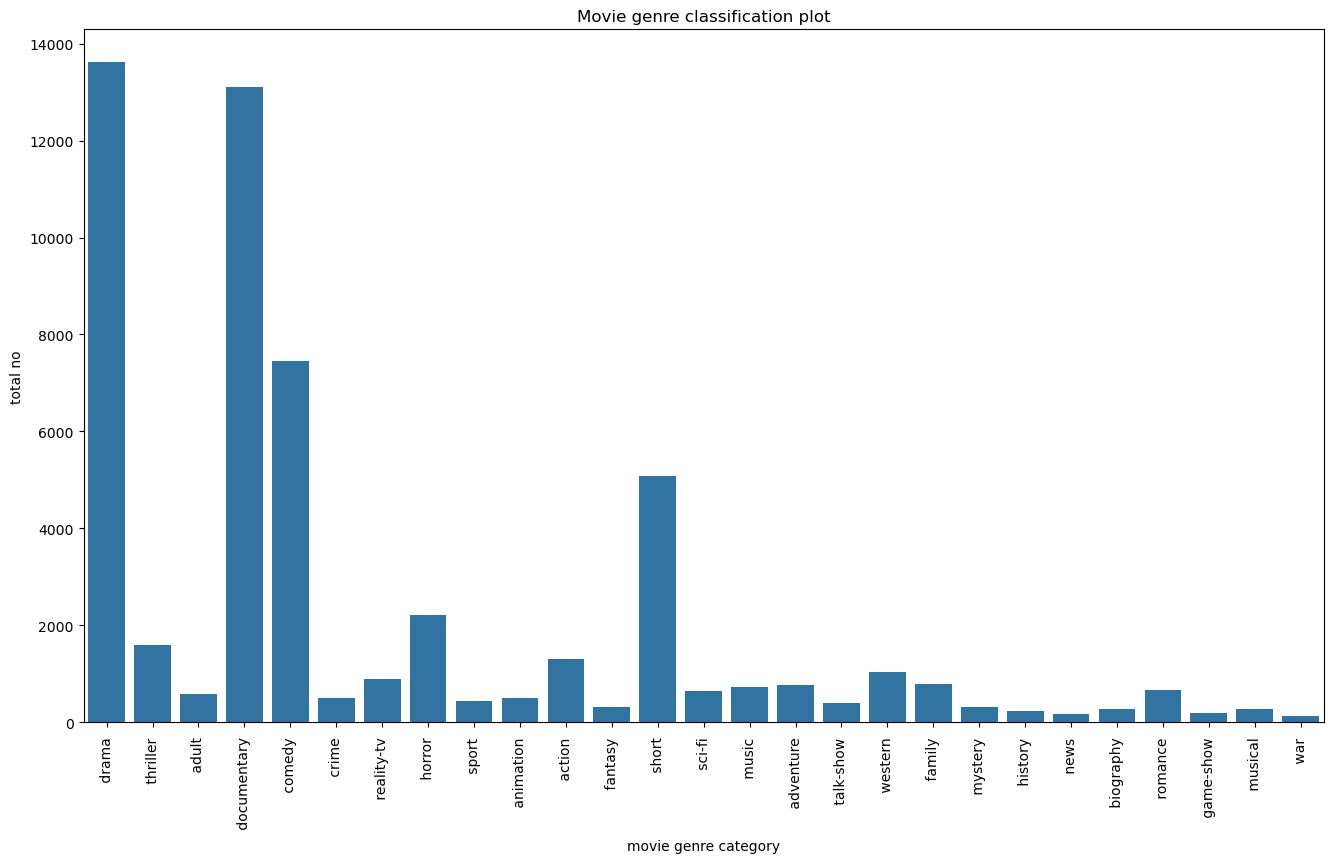

In [14]:
plt.figure(figsize=(16,9))
sns.countplot(x='type', data = train_data)
plt.xlabel('movie genre category')
plt.ylabel('total no')
plt.title('Movie genre classification plot')
plt.xticks(rotation=90);
plt.show()



In [15]:
test_solution_data = pd.read_csv('test_data_solution.txt', sep = ":::" , names = ["no", "title","type", "summary"])

In [16]:
test_solution_data_df = pd.DataFrame(test_solution_data, columns = ["no", "title","type", "summary"])

In [17]:
test_solution_data.info 

<bound method DataFrame.info of           no                             title           type  \
0          1             Edgar's Lunch (1998)       thriller    
1          2         La guerra de papá (1977)         comedy    
2          3      Off the Beaten Track (2010)    documentary    
3          4           Meu Amigo Hindu (2015)          drama    
4          5                Er nu zhai (1955)          drama    
...      ...                               ...            ...   
54195  54196   "Tales of Light & Dark" (2013)         horror    
54196  54197      Der letzte Mohikaner (1965)        western    
54197  54198              Oliver Twink (2007)          adult    
54198  54199                Slipstream (1973)          drama    
54199  54200        Curitiba Zero Grau (2010)          drama    

                                                 summary  
0       L.R. Brane loves his life - his car, his apar...  
1       Spain, March 1964: Quico is a very naughty ch...  
2       On

In [18]:
test_solution_data.head() 

,no,title,type,summary
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [19]:
vectorizer =  TfidfVectorizer(max_features=10000)

In [20]:
x_train_tf = vectorizer.fit_transform(train_data_df["summary"])
x_test_tf = vectorizer.transform(test_data_df["summary"])

In [21]:
print(f"Training dataset shape: {x_train_tf.shape}")
print(f"Test dataset shape: {x_test_tf.shape}")

Training dataset shape: (54214, 10000)
Test dataset shape: (54200, 10000)


In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data_df['type'])
print(f"Genre used in the training are;   {label_encoder.classes_} ")  

Genre used in the training are;   [' action ' ' adult ' ' adventure ' ' animation ' ' biography ' ' comedy '
 ' crime ' ' documentary ' ' drama ' ' family ' ' fantasy ' ' game-show '
 ' history ' ' horror ' ' music ' ' musical ' ' mystery ' ' news '
 ' reality-tv ' ' romance ' ' sci-fi ' ' short ' ' sport ' ' talk-show '
 ' thriller ' ' war ' ' western '] 


In [23]:
logic_reg_model = LogisticRegression(max_iter = 200)
logic_reg_model.fit(x_train_tf,y_train)

LogisticRegression(max_iter=200)

In [24]:
y_pred =logic_reg_model.predict(x_test_tf)
predictedgenre = label_encoder.inverse_transform(y_pred)

In [25]:
test_data_df['predicted_genre'] =predictedgenre
test_data_df[["title","predicted_genre"]]

,title,predicted_genre
0,Edgar's Lunch (1998),drama
1,La guerra de papá (1977),drama
2,Off the Beaten Track (2010),documentary
3,Meu Amigo Hindu (2015),drama
4,Er nu zhai (1955),drama
...,...,...
54195,"""Tales of Light & Dark"" (2013)",drama
54196,Der letzte Mohikaner (1965),drama
54197,Oliver Twink (2007),comedy
54198,Slipstream (1973),drama


In [26]:
test_data_df['predicted_genre'] =predictedgenre
merged_data = pd.merge(test_solution_data_df[['no','type']], test_data_df[['no','predicted_genre']] , on='no')

In [27]:
merged_data

,no,type,predicted_genre
0,1,thriller,drama
1,2,comedy,drama
2,3,documentary,documentary
3,4,drama,drama
4,5,drama,drama
...,...,...,...
54195,54196,horror,drama
54196,54197,western,drama
54197,54198,adult,comedy
54198,54199,drama,drama


In [28]:
accuracy = accuracy_score(merged_data['type'], merged_data['predicted_genre'])

In [29]:
print(f"Accuracy; {accuracy:.4f}")

Accuracy; 0.5945


In [30]:
print(classification_report(merged_data['type'], merged_data['predicted_genre']))

               precision    recall  f1-score   support

      action        0.51      0.29      0.37      1314
       adult        0.65      0.25      0.36       590
   adventure        0.67      0.16      0.26       775
   animation        0.59      0.04      0.08       498
   biography        0.00      0.00      0.00       264
      comedy        0.54      0.60      0.57      7446
       crime        0.41      0.03      0.06       505
 documentary        0.68      0.87      0.76     13096
       drama        0.55      0.79      0.65     13612
      family        0.48      0.08      0.14       783
     fantasy        0.61      0.03      0.06       322
   game-show        0.90      0.50      0.64       193
     history        0.00      0.00      0.00       243
      horror        0.66      0.57      0.61      2204
       music        0.68      0.46      0.55       731
     musical        0.44      0.01      0.03       276
     mystery        0.33      0.00      0.01       318
        n

In [31]:
naviebayes_model = MultinomialNB()
naviebayes_model.fit(x_train_tf,y_train)

MultinomialNB()

In [32]:
y_pred_nb =naviebayes_model.predict(x_test_tf)
predictedgenrenb = label_encoder.inverse_transform(y_pred_nb)
test_data_df['predictedgenrenb'] =predictedgenrenb
merged_data_nb =pd.merge(test_solution_data_df ,test_data_df [["no","predictedgenrenb"]], on ="no")

In [33]:
accuracy_nb = accuracy_score(merged_data_nb['type'], merged_data_nb['predictedgenrenb'])
print(f"Accuracy; {accuracy_nb:.4f}")

Accuracy; 0.5092


In [34]:
print(classification_report(merged_data_nb['type'], merged_data_nb['predictedgenrenb'], target_names = label_encoder.classes_))

               precision    recall  f1-score   support

      action        0.57      0.03      0.06      1314
       adult        0.46      0.02      0.04       590
   adventure        0.77      0.04      0.08       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.53      0.40      0.46      7446
       crime        0.00      0.00      0.00       505
 documentary        0.56      0.89      0.69     13096
       drama        0.44      0.84      0.58     13612
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        1.00      0.02      0.04       193
     history        0.00      0.00      0.00       243
      horror        0.77      0.23      0.35      2204
       music        0.89      0.02      0.04       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00      0.00       318
        n

In [35]:
svm_model = SVC( max_iter = 200)
svm_model.fit(x_train_tf,y_train)

SVC(max_iter=200)

In [36]:
y_pred_svm =svm_model.predict(x_test_tf)
predictedgenresvm = label_encoder.inverse_transform(y_pred_svm)
test_data_df['predictedgenresvm'] =predictedgenresvm
merged_data_svm =pd.merge(test_solution_data_df ,test_data_df [["no","predictedgenresvm"]], on ="no")


In [38]:
accuracy_svm = accuracy_score(merged_data_svm['type'], merged_data_svm['predictedgenresvm'])
print(f"Accuracy; {accuracy_svm:.4f}")


Accuracy; 0.4606


In [39]:
print(classification_report(merged_data_svm['type'], merged_data_svm['predictedgenresvm'], target_names = label_encoder.classes_))

               precision    recall  f1-score   support

      action        0.26      0.39      0.31      1314
       adult        0.41      0.51      0.46       590
   adventure        0.22      0.29      0.25       775
   animation        0.21      0.21      0.21       498
   biography        0.06      0.07      0.06       264
      comedy        0.36      0.56      0.44      7446
       crime        0.14      0.18      0.16       505
 documentary        0.66      0.69      0.67     13096
       drama        0.53      0.39      0.45     13612
      family        0.18      0.16      0.17       783
     fantasy        0.21      0.12      0.16       322
   game-show        0.85      0.59      0.69       193
     history        0.09      0.05      0.06       243
      horror        0.53      0.53      0.53      2204
       music        0.48      0.56      0.51       731
     musical        0.19      0.08      0.12       276
     mystery        0.17      0.09      0.12       318
        n

In [48]:
#testing the model now 

summary=['A man in search of his love','a girl fighting to revenge the death of her father']

test_data_df = vectorizer.transform(summary)#transform the summary to td-idf features

y_predict_logisticregression = logic_reg_model.predict(test_data_df)#using logistic regression model to check
predicted_logisticregression = label_encoder.inverse_transform(y_predict_logisticregression)

y_predict_naivebayes = naviebayes_model.predict(test_data_df)#using naive bayes  model to check
predicted_naivebayes = label_encoder.inverse_transform(y_predict_naivebayes)

y_predict_svm = svm_model.predict(test_data_df)#using svm  model to check
predicted_svm = label_encoder.inverse_transform(y_predict_svm)


for i, message in enumerate(summary):
    print(f"summary; {summary}")
    print(f"\t\tPredicted genre by Logistic regression model is ; {predicted_logisticregression[i]}")
    print(f"\t\tPredicted genre by Naive Bayes is ; {predicted_naivebayes[i]}")
    print(f"\t\tPredicted genre by svm model is ; {predicted_svm[i]}")
    print("-"*50)
    #max_iter = 200

summary; ['A man in search of his love', 'a girl fighting to revenge the death of her father']
		Predicted genre by Logistic regression model is ;  drama 
		Predicted genre by Naive Bayes is ;  drama 
		Predicted genre by svm model is ;  romance 
--------------------------------------------------
summary; ['A man in search of his love', 'a girl fighting to revenge the death of her father']
		Predicted genre by Logistic regression model is ;  drama 
		Predicted genre by Naive Bayes is ;  drama 
		Predicted genre by svm model is ;  action 
--------------------------------------------------
